### Install TensorFlow 2.0

If you are running this notebook in Colab, the magic command below will install the most recent version. If you prefer working in Jupyter locally, you will need to install TensorFlow 2.0 on your system, using ```!pip install tensorflow==2.1.0```.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


### Check which TF version is installed
TensorFlow 2.0 is currently under development. It's good practice to check which version you have installed. All the code you'll write in this course will be for version 2.0 (currently in beta).

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [0]:
# Check GPU
!nvidia-smi

Sat Mar 28 22:11:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define, train, and evaluate a linear model

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 1. create a history object to store the results of model.fit
# ```history = model.fit(...)```
# 2. add another parameter to model.fit for validation data
# https://keras.io/models/sequential/
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4739 - accuracy: 0.8754 - val_loss: 0.3127 - val_accuracy: 0.9133
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3047 - accuracy: 0.9149 - val_loss: 0.2822 - val_accuracy: 0.9205
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2836 - accuracy: 0.9202 - val_loss: 0.2757 - val_accuracy: 0.9234
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2732 - accuracy: 0.9230 - val_loss: 0.2725 - val_accuracy: 0.9244
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2667 - accuracy: 0.9255 - val_loss: 0.2649 - val_accuracy: 0.9265
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2615 - accuracy: 0.9271 - val_loss: 0.2635 - val_accuracy: 0.9259
Epoch 7/10
60000/60000 [==============================] 

In [0]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))
  fig = plt.figure(figsize=(15, 5))
  ax1 = fig.add_subplot(121)
  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  ax1 = fig.add_subplot(122)
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2638 - accuracy: 0.9248 - val_loss: 0.1563 - val_accuracy: 0.9536
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1183 - accuracy: 0.9643 - val_loss: 0.1183 - val_accuracy: 0.9629
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.0851 - val_accuracy: 0.9745
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0770 - val_accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0707 - val_accuracy: 0.9782
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0814 - val_accuracy: 0.9740
Epoch 7/10
60000/60000 [==============================] 

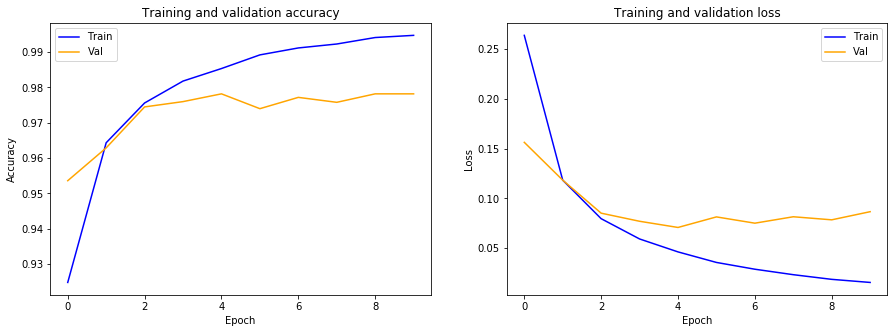

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Modify me
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot(history)

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Modify me
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test) )
plot(history)

### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

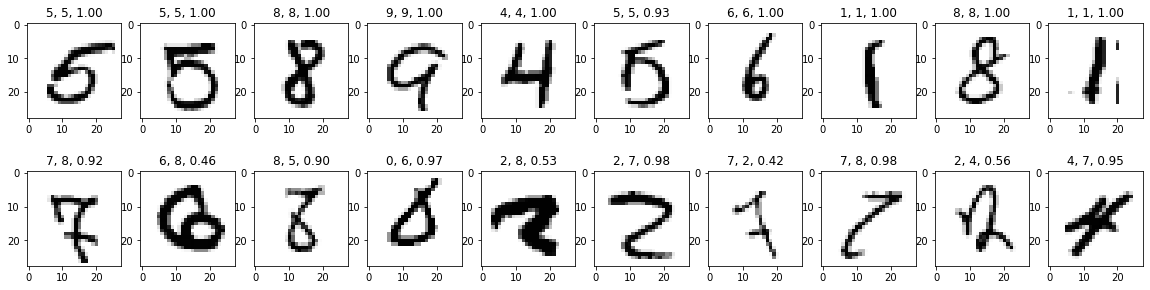

In [0]:
import numpy as np

# Predict and identify correct examples
confidence_score = model.predict(x_test)
y_predict = np.argmax(confidence_score, axis=1)
confidence_score_max = np.max(confidence_score, axis=1)
indicator_correct = y_predict == y_test
index_correct = np.where(indicator_correct)
index_correct = index_correct[0]
index_incorrect = np.where(~indicator_correct)
index_incorrect = index_incorrect[0]

# Display correct and incorrect examples
def plot_digit(index_correct, index_incorrect, confidence_score_max, y_test, y_predict, n_display=10, dims=28):
  # Pick random sets of correct and incorrect images
  ind_rand = np.random.randint(low=1, high=index_correct.shape[0], size=n_display)
  ind_correct = index_correct[ind_rand]
  correct_digit = x_test[ind_correct, :]

  ind_rand = np.random.randint(low=1, high=index_incorrect.shape[0], size=n_display)
  ind_incorrect = index_incorrect[ind_rand]
  incorrect_digit = x_test[ind_incorrect, :]

  # Plot the images
  fig = plt.figure(figsize=(20, 10))
  for ii in range(n_display):
    # Correct
    image_array = np.reshape(correct_digit[ii, :], (dims, dims))
    ax1 = fig.add_subplot(1, n_display, ii+1)
    plt.imshow(image_array, cmap='Greys')
    plt.title("{0:.0f}, {1:.0f}, {2:.2f}".format(y_test[ind_correct[ii]], y_predict[ind_correct[ii]], confidence_score_max[ind_correct[ii]]))

     # Incorrect
    image_array = np.reshape(incorrect_digit[ii, :], (dims, dims))
    ax1 = fig.add_subplot(2, n_display, n_display+ii+1)
    plt.imshow(image_array, cmap='Greys')
    plt.title("{0:.0f}, {1:.0f}, {2:.2f}".format(y_test[ind_incorrect[ii]], y_predict[ind_incorrect[ii]], confidence_score_max[ind_incorrect[ii]]))
   
plot_digit(index_correct, index_incorrect, confidence_score_max, y_test, y_predict)

In [0]:
print("Correct confidence score: {:.4f}".format(np.mean(confidence_score_max[index_correct])))
print("Incorrect confidence score: {:.4f}".format(np.mean(confidence_score_max[index_incorrect])))


Correct confidence score: 0.9933
Incorrect confidence score: 0.7905


## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/tutorials/quickstart/advanced)
* [Tensors and operations](https://www.tensorflow.org/tutorials/eager/basics)
* [Keras overview](https://www.tensorflow.org/guide/keras/overview)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/beta/tutorials/load_data/images).

In [0]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


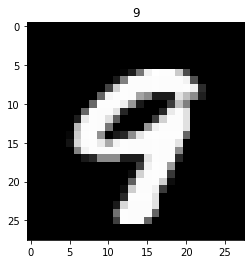

In [0]:
import numpy as np
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  plt.title(str(np.array(label[0])))

### Define and train a linear model

You may see some warnings running the below code (that's okay, just a matter of TF 2.0 being under active development).

In [0]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [0]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Challenge: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the one on slide #50 of lecture 1:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/mnist-weights.png)

**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [0]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# Direct access
weights, bias = model.d1.weights
print(weights.shape)

# Public API
weights, bias = model.get_layer('dense1').get_weights() # get the weights
print(weights.shape)




(784, 10)
(784, 10)


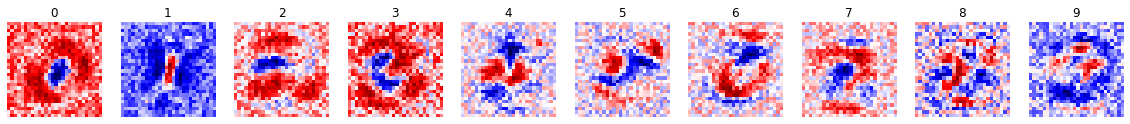

In [0]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')

  # Modify me
  i_weights = weights[:, i] # Select the weights for the i'th output
  img = np.reshape(i_weights, (28, 28)) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [0]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()

    # Modify me
    self.d1 = Dense(128, activation='relu', name='dense_128')
    self.d2 = Dense(64, activation='relu', name='64')
    self.d3 = Dense(32, activation='relu', name='dense_32')
    self.d_out = Dense(10, activation='softmax', name='output_layer')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d_out(x)

model = MyDNN()


In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [0]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {0:d}, Loss: {1:.4f}, Accuracy: {2:.4f}, Test Loss: {3:.4f}, Test Accuracy: {4:.4f}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.0315, Accuracy: 98.9858, Test Loss: 0.0988, Test Accuracy: 97.5650
Epoch 2, Loss: 0.0253, Accuracy: 99.1667, Test Loss: 0.0993, Test Accuracy: 97.7400
Epoch 3, Loss: 0.0241, Accuracy: 99.1817, Test Loss: 0.0892, Test Accuracy: 97.9400
Epoch 4, Loss: 0.0219, Accuracy: 99.3017, Test Loss: 0.0870, Test Accuracy: 98.0100
Epoch 5, Loss: 0.0177, Accuracy: 99.4183, Test Loss: 0.0951, Test Accuracy: 97.9800


### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [0]:
# TODO: your code here

def my_softmax(x):  
  output = tf.exp(x) / tf.reduce_sum(tf.exp(x))
  return output

class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = MyLinearModel()

# Define loss, optimizer and metrics
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# Define train and test function to apply to each batch
@tf.function
def train_step(images, labels):
  # Compute gradients and apply to weights
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record the loss and accuracy
  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

# Training loop   
EPOCHS = 10

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {0:d}, Loss: {1:.4f}, Accuracy: {2:.4f}, Test Loss: {3:.4f}, Test Accuracy: {4:.4f}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()